# Spanish Electricity Market Analysis: Part 2/2

## Part 2: Statistics and Data Visualization

This project wants to answer some questions on electricity consumption in Spain. 

- Are we following the European directives on sustainaibility? 20-20-20 Goals 
    - 20% Energy efficiency
    - 20% reduction on $CO_2$ emissions
    - 20% share of renewables 

- Are there some patterns that we are following based on our energy consumption? 

The first part of the project wants to perform the data cleaning and data wrangling. The second part of the project, based on this script, is to perform the Exploratory Data Analysis and the data visualization. To answer these questions, there are some subquestions to analyse to some EDA to perform. This paper is structured as follows: 

- 2.1 Daily Electricity Generation Probability Distribution
- 2.2 Daily Electricity generation time-series plotting 
- 2.3 Annual Boxplot distribution. Is Electricity consumption increasing?
- 2.4 Hypotheses Testing. Is Electricity consumption increasing? 
- 2.5 Seasonality trend. Does electricity consumption vary depending on the season?
- 2.6 Weekly trend. Does electricity consumption vary depending on the day of the week? 
- 2.7 Summer analysis from 2014-2018 
- 2.8 Yearly electricity generation per source. Nested Pie charts
- 2.9 Electricity consumption on 21st and 22nd July, 2019. User's trends
- 2.10 Conclusions

In [8]:
#import libraries
import pandas as pd
import seaborn as sns
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import numpy as np
import datetime as dt
from scipy import stats

sns.set()

In [2]:
plt.style.use('ggplot') #setting the style as ggplot

### 2.1.Daily electricity generation. Probability Distribution

The first step to perform an Exploratory Data Analysis is to analyse the quality of data. From the cleaned dataset that is called `PBF_total.csv`, we can analyse the probability distribution and also the time series evolution of the variable Total Generation Demand. 
The source we are analysing covers the years 2014 until 2018. 

In [3]:
os.getcwd()
PBF_total_df = pd.read_csv('cleaned_data/PBF_total_df.csv', index_col=0) #reading the csv file with the aggregated data from 2014-2018. 

In [4]:
PBF_total_df.head()

,value
date,
2014-01-01,642771.8
2014-01-02,658078.5
2014-01-03,680564.6
2014-01-04,644494.7
2014-01-05,598661.4


In [5]:
PBF_total_df.index = pd.to_datetime(PBF_total_df.index)


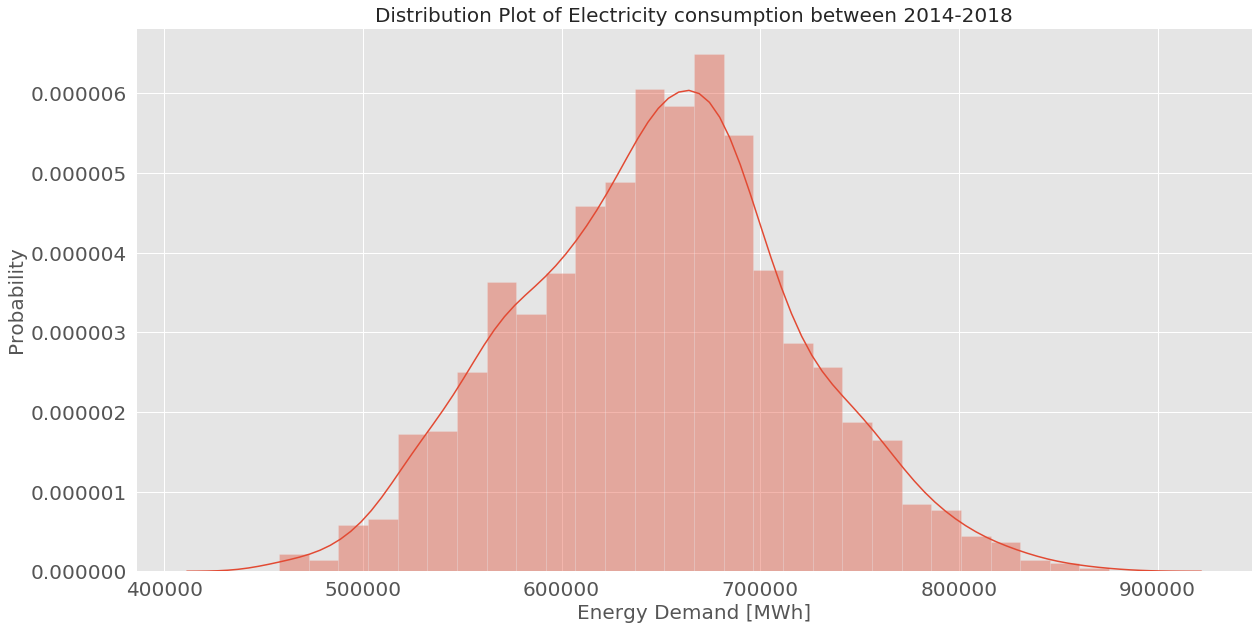

In [6]:
plt.figure(figsize=(20,10))
sns.distplot(PBF_total_df['value'])
plt.title('Distribution Plot of Electricity consumption between 2014-2018', fontsize=20)
plt.xlabel('Energy Demand [MWh]', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('figures/energy_consumption_hist.png', dpi=300)
plt.show()

From this graph, we can see that it can follow a normal distribution but it is still a little bit skewed to the left. the parameters of this probability distribution would be: 

 `mean`: 648991.317 MWh
 
 `standard deviation`: 69506.159 MWh


In [437]:
mean =  PBF_total_df.value.mean()
std =  PBF_total_df.value.std()

However, we can perform a normal test to prove whether it follows a normal distribution or not. 

In [9]:
stats.normaltest(PBF_total_df['value'])

NormaltestResult(statistic=2.6165165772587193, pvalue=0.27029041454008773)

According to the results of the normal test, with a p-value of 0.27029 and a confidence interval of 0.95, being $\alpha = 0.05 $, we can say that the null hypotheses **cannot** be rejected and hence, the daily electricity consumption variable follows a normal distribution with a confidence of 95%. 

Also, based on this test we can state the mathematical proof that states the following: 

The sum of two or more independent normally distributed random variables is normal, with its mean being the sum of the two means, and its variance being the sum of the two variances. This case can be demonstrated here, since we have the random variable the consumption at each hour which follow a normal distribution. 

### 2.2. Daily Energy

We can plot the time series evolution of the daily energy demand in Spain for time periods between January 1st 2014 and December 31st 2018. 

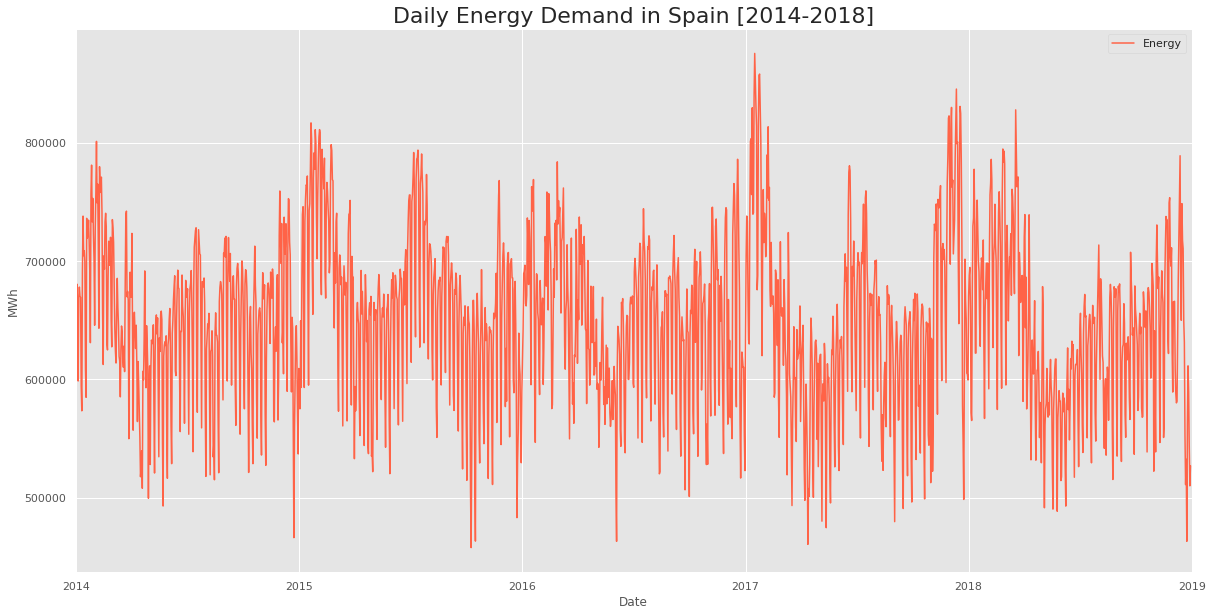

In [440]:
plt.figure(figsize=(20,10))
plt.plot(PBF_total_df.index, PBF_total_df.value, label='Energy', color='tomato' )
plt.ylabel('MWh')
plt.xlabel('Date')
plt.title('Daily Energy Demand in Spain [2014-2018]', fontsize=22)
plt.xlim(('2014', '2019'))
plt.legend()

plt.savefig('figures/timeseries_consumption_2014_2018.png', dpi=300)
plt.show()


As can be seen from the plot above, there are some trends that can be highlighted, as the energy consumption at the beginning of the year is higher than in other periods of the year. However, from a time-series plot it is not possible to perform an EDA. 

In order to be able to perform a data analysis over time-series, we need to split our date into year, quarter, month, and weekday

In [30]:
PBF_total_df['year'] = PBF_total_df.index.year #to specify only the year. 
PBF_total_df['quarter'] = PBF_total_df.index.quarter #to see to which season it belongs
PBF_total_df['month'] = PBF_total_df.index.month #to specify only the month
PBF_total_df['week'] = PBF_total_df.index.week #specify the week of the year
PBF_total_df['weekday'] = PBF_total_df.index.weekday #specify the day of the week (0 Monday and 6 Sunday)

In [ ]:
PBF_total_df[-10:]

### 2.3.  Annual Boxplot distribution. Is Electricity consumption increasing? 


One of our first questions to analyse is if there's an increase in electricity consumption. To do that, we can analyse what has been the performance of the electricity consumption based on the yearly data we have from 2014 to 2018. To do so, the best idea is to perform an hypotheses testing. Furthermore, in order to visually see what is the trend on electricity consumption, we can begin with an Annual Boxplot distribution per year. 

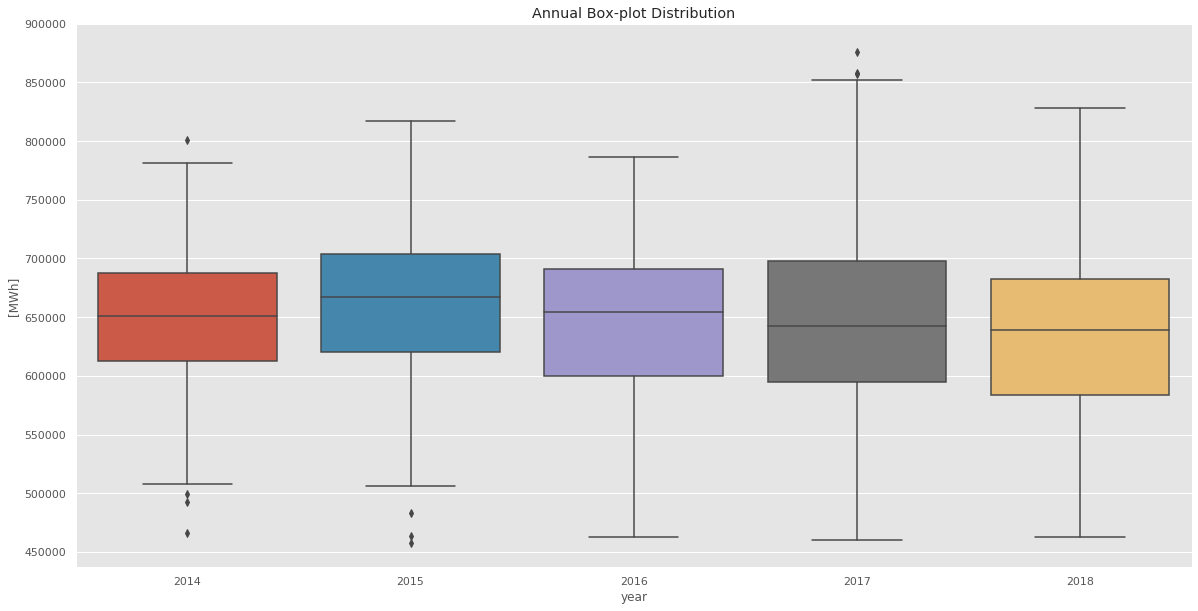

In [91]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df["2014":"2018"], x="year", y="value")
plt.title("Annual Box-plot Distribution")
plt.ylabel('[MWh]')
plt.yticks(np.arange(450000,950000,50000))
plt.show()


From the graph below we cannot conclude whether there is a positive or negative trend in electricity consumption. To have a better understanding, an hypotheses testing should be performed. 


## 2.4. Hypotheses testing

As has been said above, we can consider that our variable electricity consumption follows a normal distribution. Hence, we can use the data to perform an hypothesis test, to see whether the change in the electricity consumption between 2014 and 2018 has been significant or not. In this case, we are considering some assumptions that should be beared in mind. 

`Assumptions:`

- The hystorical data between years 2014 and 2017 is considered as a normal distribution and their mean as standard deviation will be considered as the population ones to perform the hypotheses test. 

- Then, using these values, we will perform the hypotheses testing. 


`Hypotheses:`

$H_O: \mu_{2018} = \mu_{2014-2017}$

$H_A: \mu_{2018} \neq \mu_{2014-2017}$

`Variables:`

$\alpha = 0.05 $ 

$CI = 95\%$

In [15]:
pop_mean =  PBF_total_df["2014":"2018"]['value'].mean()
pop_std =  PBF_total_df["2014":"2018"]['value'].mean()

In [26]:
pop_mean

648991.317369863

In [24]:
stats.ttest_1samp(a= PBF_total_df["2018"].value,         # Sample data
                  popmean= pop_mean)              # Pop mean

Ttest_1sampResult(statistic=-3.1189079166324722, pvalue=0.0019602964554773466)

According to the value above, we can say with a confidence up to 95% that we **can** reject the null hypotheses and hence, the mean daily electricity consumption in 2018 has been significantly different from the years before. 

In [25]:
PBF_total_df["2018"].value.mean()

637918.2304945055

By computing the differences in the mean values, we can calculate the increase or decrease on the average consumption and it is of a value about 2% consumption decrease.  

In [27]:
avg_diff = ((PBF_total_df["2018"].value.mean() - pop_mean)/PBF_total_df["2018"].value.mean())*100

In [28]:
avg_diff

-1.735816025632916

## 2.5. Seasonality trend. Does electricity consumption vary depending on the season? 

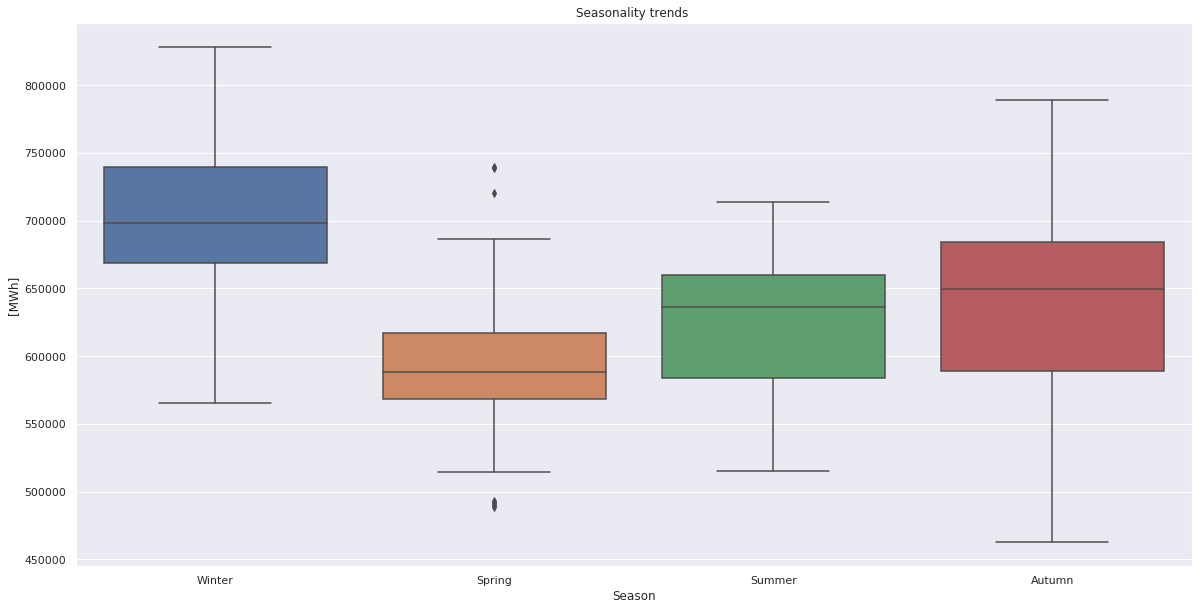

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df['2018'], x="quarter", y="value")
plt.title("Seasonality trends ")
plt.ylabel('[MWh]')
plt.xlabel('Season')
plt.xticks(np.arange(0,4), ('Winter', 'Spring', 'Summer', 'Autumn'))
plt.show()

We are considering data between years 2014-2018. In this case, we are visually assessing by means of boxplots if there are siginificant changes in the electricity consumption between these days, stratified by season. According to the boxplots above, we can see that Winter is the season where most electricity is consumed. This can be considered as a little bit weird since Spain doesn't have very cold winters compared to other countries around Europe. However, according to literature [1,2], Spanish citizens spend 47% of the total energy bill for heating purposes. Moreover, there are not strict regulation laws in terms of construction materials for houses and hence the isolation of them can be considered as poor. 

Regarding this, we can also say that normally in Spain more people has heating systems rather than air conditioned, an, even if we are experiencing the warmest summers that the Earth has suffered, the electricity consumption in Summers is not as in Winters. A further research that could be analysed here would be if the trend will change in the following years due to climate change. 

## 2.6. Weekly trend. Does electricity consumption vary depending on the day of the week? 

In this case, we want to dig deeper into the electricity consumption of the Spanish population between 2014 and 2018. In this section we are visually analyzing whether the electricity consumption varies depending on the weekday. This section covers different visualization methods, since for different kind of audience it could be more understandable one type of plot rather than others. 

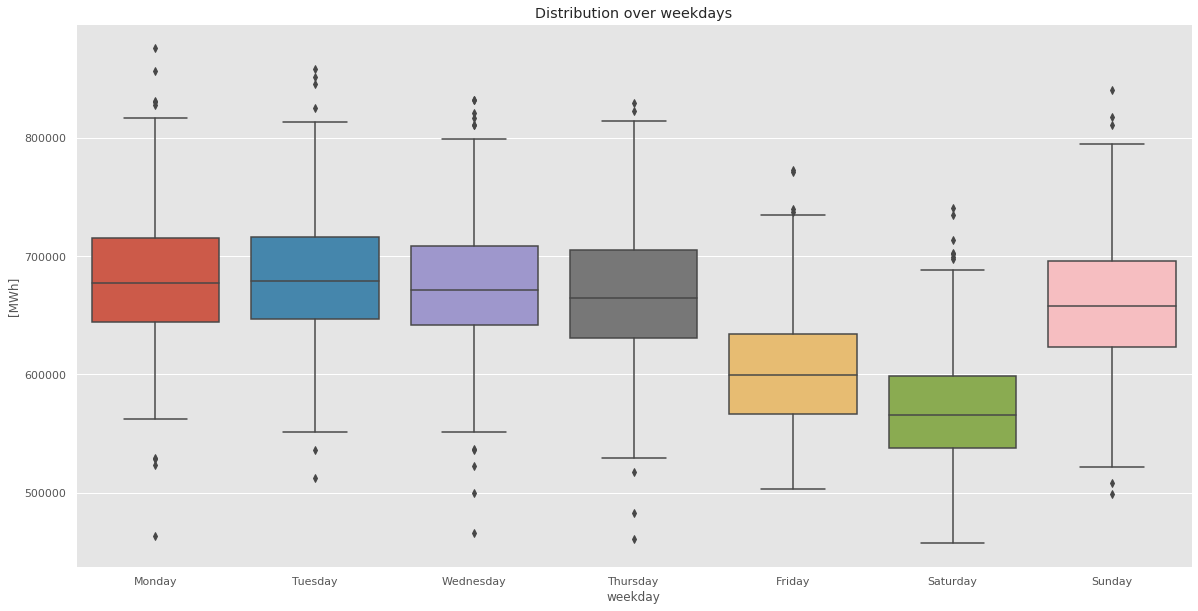

In [93]:
plt.figure(figsize=(20,10))

sns.boxplot(data=PBF_total_df, x="weekday", y="value")
plt.title("Distribution over weekdays")
plt.xticks(np.arange(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

plt.ylabel("[MWh]")
plt.show()


By means of this boxplot we can see that there are clearly two patterns in our electricity consumption. According to the boxplot, during weekdays meaning from Monday to Thursday, the electricity consumption is around 650.000 MWh. However, on Fridays and Saturdays the electricity consumption drops compared to other weekdays. This is due to the fact that some companies have reduced schedules on Fridays and they are closed on Saturdays. Despite this, on Sundays the electricity consumptions raises again since more people are resting at their homes. However, even if the electricity consumption raises, it is still lower than during weekdays. 

Sometimes boxplots are not the most intuitive tools to explain the behaviour or the trends of some random variables to non-technical audience. This is why sometimes changing the plot type can help. In this case, we try to explain the same concept by means of a bar plot, as can be seen below. By doing this, we can see exactly the same trend and conclude in the same way, that there are clearly two different patterns depending on the day of the week. 

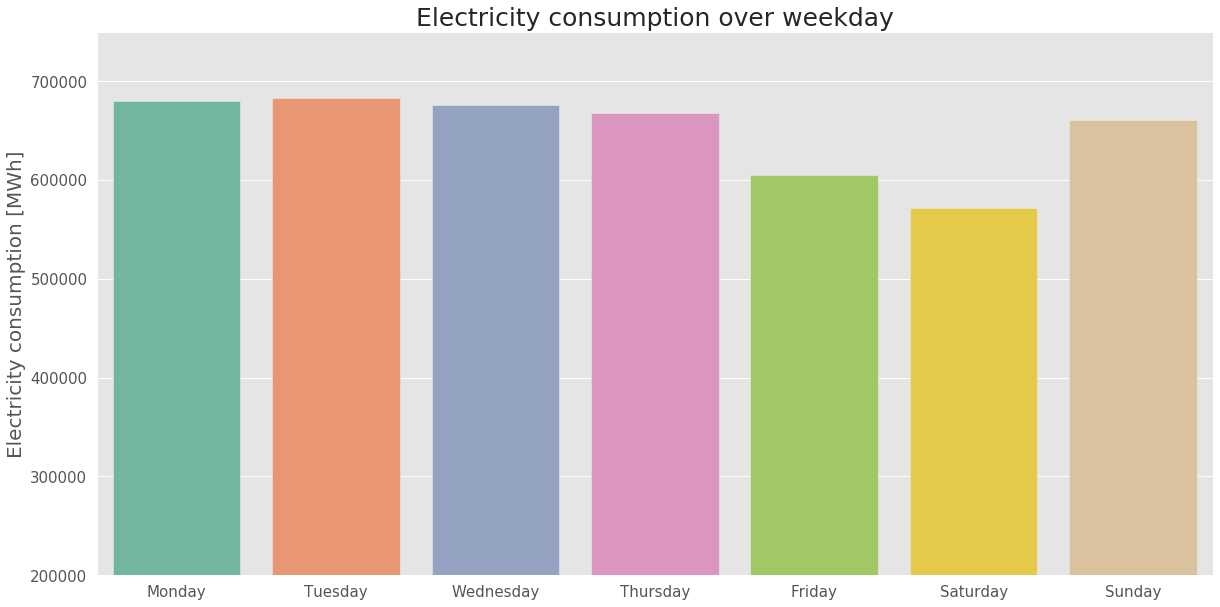

In [126]:
plt.figure(figsize=(20,10))
pal = sns.color_palette("Set2")

sns.barplot(data=PBF_total_df, x="weekday", y="value", capsize=0.2, palette=pal, alpha=1, ci=None)
plt.title("Electricity consumption over weekday", fontsize=25)
plt.xticks(np.arange(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), fontsize=15)
plt.ylim(200000,750000)

plt.ylabel("Electricity consumption [MWh]", fontsize=20)
plt.xlabel('')
plt.yticks(fontsize=15)

plt.savefig('figures/weekly_consumption.png', dpi=300)
plt.show()


### Violin plot for weekly energy consumption


By means of violin plots we can have the same information as in a boxplot and also looking at the distribution of the random variable. Here, we can see and also we can prove what we have said before, that if we same different random variables that are independent and are equally distributed (being in this case normally distributed), the sum or aggregation of the random variables, being in this case the total consumption for the entire year, it follows a normal distribution with a mean value equal to the sum of the random variables' mean. This is called the Central Limit Theorem and by taking a look at this graph and also by doing the normal test it can be proved. 

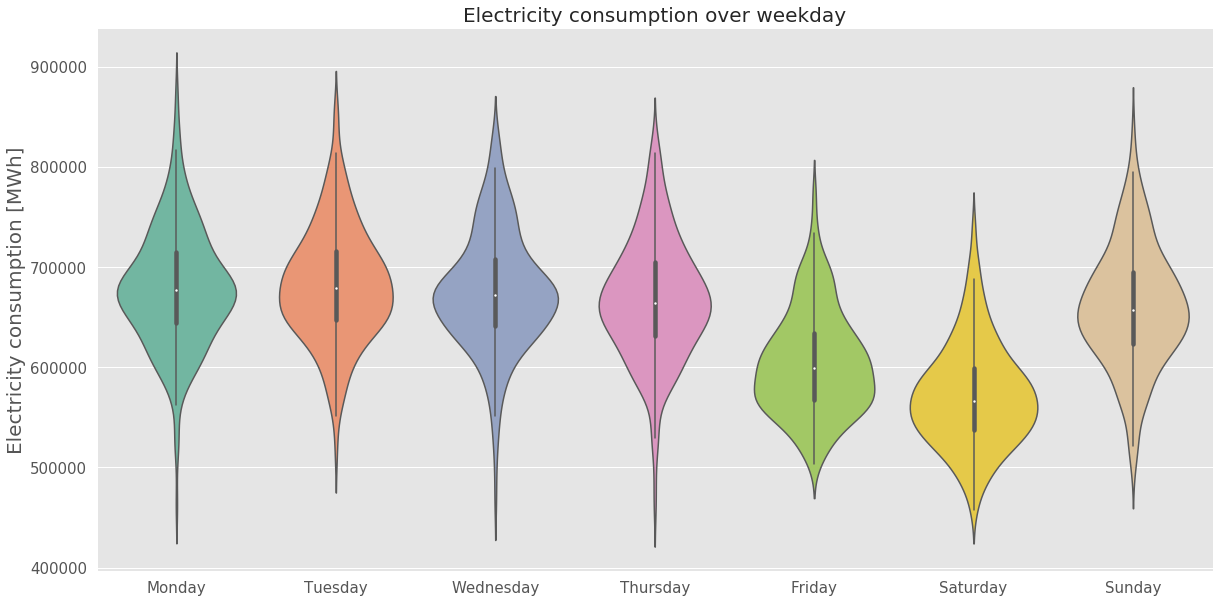

In [133]:
plt.figure(figsize=(20,10))
sns.violinplot(data=PBF_total_df, x="weekday", y="value", palette=pal, alpha=1)
plt.title("Electricity consumption over weekday", fontsize=20)
plt.xticks(np.arange(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), fontsize=15)

plt.ylabel("Electricity consumption [MWh]", fontsize=20)
plt.xlabel('')
plt.yticks(fontsize=15)

plt.savefig('figures/violin_weekly_consumption.png', dpi=300)
plt.show()

## 2.7. Distribution over summers

After looking at which is the season with a higher level of electricity consumption, we were wondering what happened during summers between 2014 and 2018, since every year we are more likely to suffer heat waves in Spain. Is the electricity consumption increasing during summer? Are there some trends that can be hihglighted? In this case, we have analysed it visually as we have done before, by means of a boxplot. 

In this case, we can see that the consumption reaches its maximum during Summer 2015. What happened then? We were thinking that every year the electricity consumption is increasing during Summer due to global warming. However, 2015 was the hottest year in the Earth, as the National Aeronautics and Space Administration stated by that year [3].

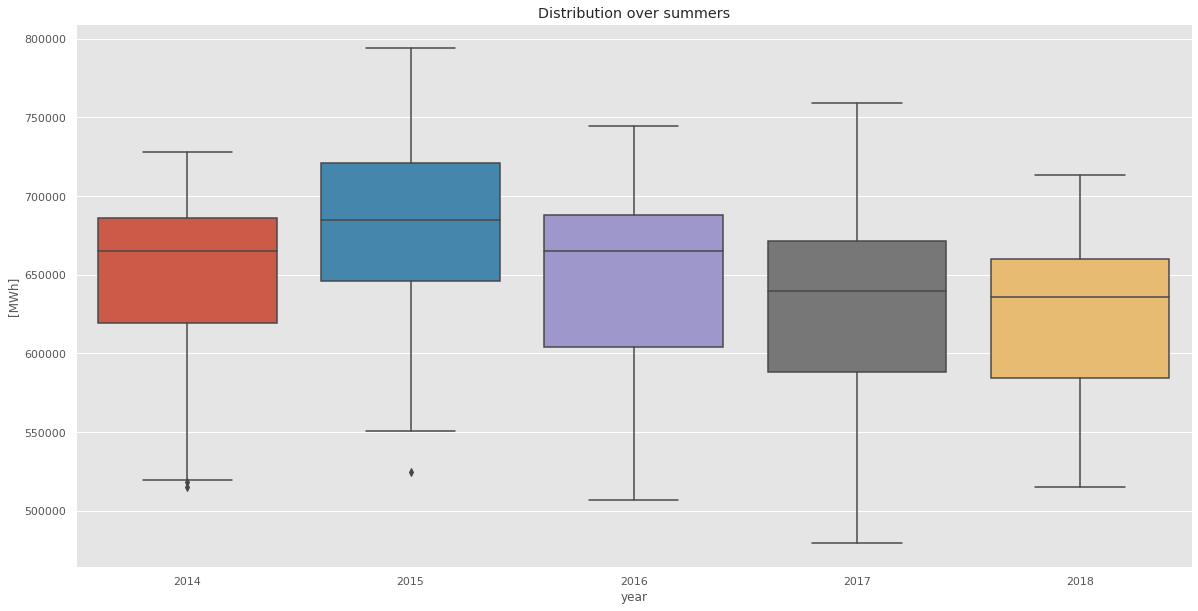

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(data=PBF_total_df[PBF_total_df['quarter']==3], x="year", y="value")
plt.title("Distribution over summers")


plt.ylabel("[MWh]")
plt.show()

## 2.8. Yearly electricity generation per source. Nested Pie charts

In order to answer whether Spain is following European Comission's directives for 2020, let's check which has been the electricity generation for each type of source. We are also using aggregated data for each day total consumption or generation, but stratified per source. Since we would like to see the results in the more visual way, we are working here in this section with pie charts and nested pie charts. 


In [13]:
os.getcwd()

'/home/ingrid/Documents/DA_Ironhack/Week5/Project-Week-5-Your-Own-Project/your-project'

In [14]:
gen_source_df = pd.read_csv('cleaned_data/generation_per_source.csv') #reading the csv file with the aggregated data from 2014-2018. 

In [15]:
gen_source_df['date'] = pd.to_datetime(gen_source_df['date'])

In [16]:
gen_source_df.dtypes #we check it is a datetime object 

date         datetime64[ns]
source               object
value_MWh           float64
dtype: object

In [17]:
gen_source_df['year'] = gen_source_df['date'].dt.year

In [18]:
gen_source_df.head()

,date,source,value_MWh,year
0,2014-01-01,CHP,4497.5,2014
1,2014-01-01,coal,2498.7,2014
2,2014-01-01,hydro_1,87564.8,2014
3,2014-01-01,hydro_2,15226.2,2014
4,2014-01-01,natural_gas,75993.1,2014


In this case, we are not considering the two types of hydro, since in this project they can be both considered as hydro renewable sources. For this reason, we will aggregate them. 


In [19]:
names = {'hydro_1':'hydro', 'hydro_2':'hydro'}
gen_source_df['source'].replace(names,inplace=True)
gen_source_df = gen_source_df.groupby(['date', 'source','year'], as_index=False).agg('sum')

In [20]:
gen_source_df.head()

,date,source,year,value_MWh
0,2014-01-01,CHP,2014,4497.5
1,2014-01-01,coal,2014,2498.7
2,2014-01-01,hydro,2014,102791.0
3,2014-01-01,natural_gas,2014,75993.1
4,2014-01-01,nuclear,2014,144654.6


### Adding new columns to have renewable and non-renewable sources

In [21]:
gen_source_df.source.unique() #checking the labels we have as sources. 

array(['CHP', 'coal', 'hydro', 'natural_gas', 'nuclear', 'solar_PV',
       'wind_power'], dtype=object)

In [22]:
RES_lst = ['hydro', 'solar_PV', 'wind_power']
CES_lst = ['CHP', 'coal', 'natural_gas', 'nuclear']
total_sources = RES_lst + CES_lst

In [23]:
gen_source_df['RES_CES'] = gen_source_df['source'].apply(lambda x: 'Renewable' if x in RES_lst else 'Conventional')


In [24]:
gen_source_df.head()

,date,source,year,value_MWh,RES_CES
0,2014-01-01,CHP,2014,4497.5,Conventional
1,2014-01-01,coal,2014,2498.7,Conventional
2,2014-01-01,hydro,2014,102791.0,Renewable
3,2014-01-01,natural_gas,2014,75993.1,Conventional
4,2014-01-01,nuclear,2014,144654.6,Conventional


### Grouping by year and source to plot a pie chart
### Pie chart: evolution of Energy Resources for Electricity generation in Spain (yearly total electricity produced)

In [25]:
agg_gen = gen_source_df.groupby(by=['year', 'RES_CES', 'source']).sum()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


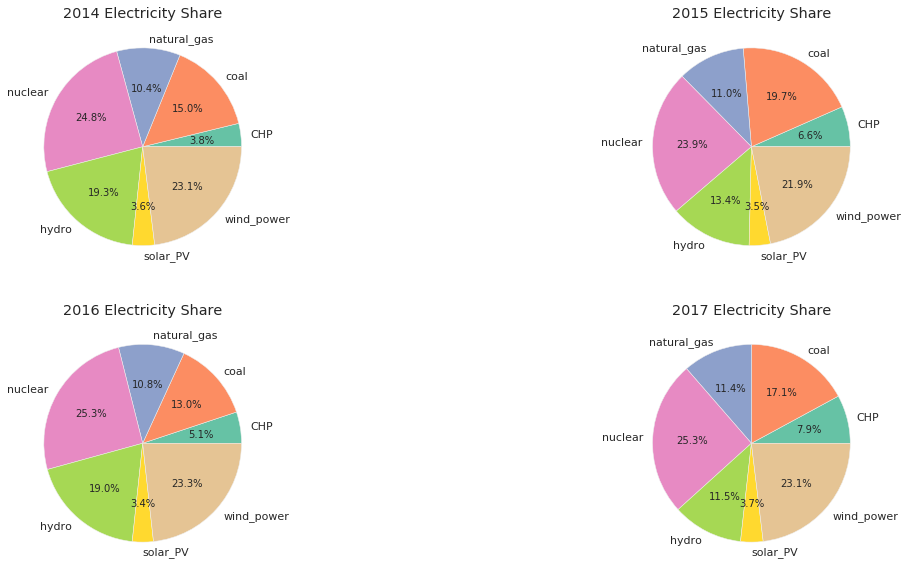

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


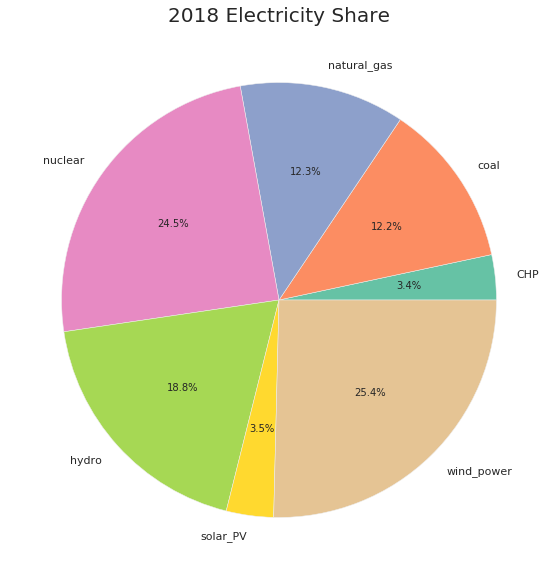

In [28]:
years=agg_gen.index.levels[0][:-1]
labels=agg_gen.index.get_level_values(2)[:len(total_sources)]
fig,axs = plt.subplots(2,2, figsize=(20,10))
axs = axs.ravel()

for i in range(len(years)):
    axs[i].pie(agg_gen.loc[years[i],:], labels=labels, colors= outer_colors, autopct='%1.1f%%')
    axs[i].set_title(str(years[i]) + ' Electricity Share')

plt.show()

plt.figure(figsize=(20,10))
plt.pie(agg_gen.loc[2018,:], labels=labels, colors= outer_colors, autopct='%1.1f%%')
plt.title('2018 Electricity Share', fontsize=20)


plt.show()

### Donut pie chart to have data in a fancier way

In [229]:
agg_gen.index.get_level_values(2)[:len(total_sources)]

Index(['CHP', 'coal', 'natural_gas', 'nuclear', 'hydro', 'solar_PV',
       'wind_power'],
      dtype='object', name='source')

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


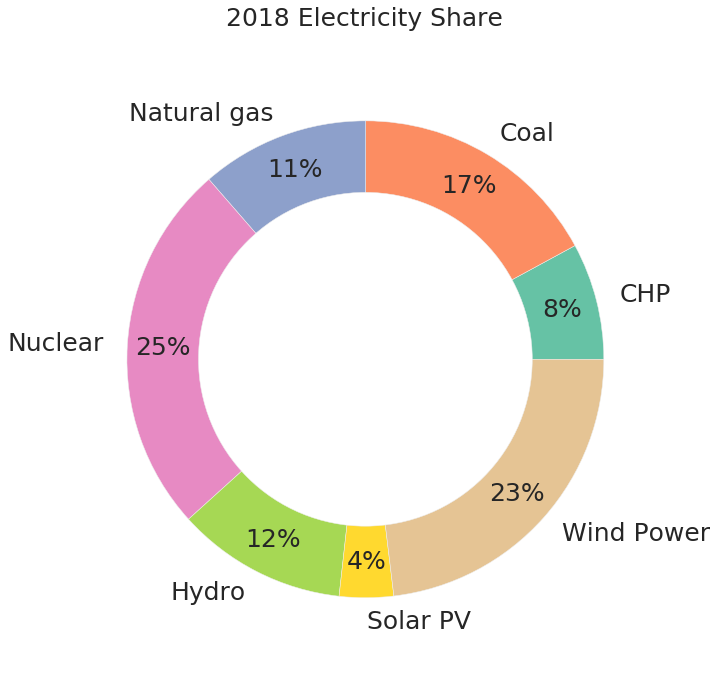

In [411]:
cmap = plt.get_cmap("Set2")
outer_colors = cmap(np.arange(8))
inner_colors = cmap(np.arange(2))



#labels=agg_gen.index.get_level_values(2)[:len(total_sources)]
labels=['CHP', 'Coal', 'Natural gas', 'Nuclear', 'Hydro', 'Solar PV',
       'Wind Power']

fig, ax= plt.subplots(figsize=(10,10))
ax.axis('equal')
width=0.6


plt.pie(agg_gen.loc[years[i],:], labels=labels, colors= outer_colors, autopct='%1.0f%%', pctdistance=0.85, labeldistance=1.1,  textprops={'fontsize': 25})
plt.title('2018 Electricity Share', fontsize=25)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.savefig('figures/2018_share.png', dpi=300)
plt.show()



### Nested pie for renewable and conventional generation in 2018. 

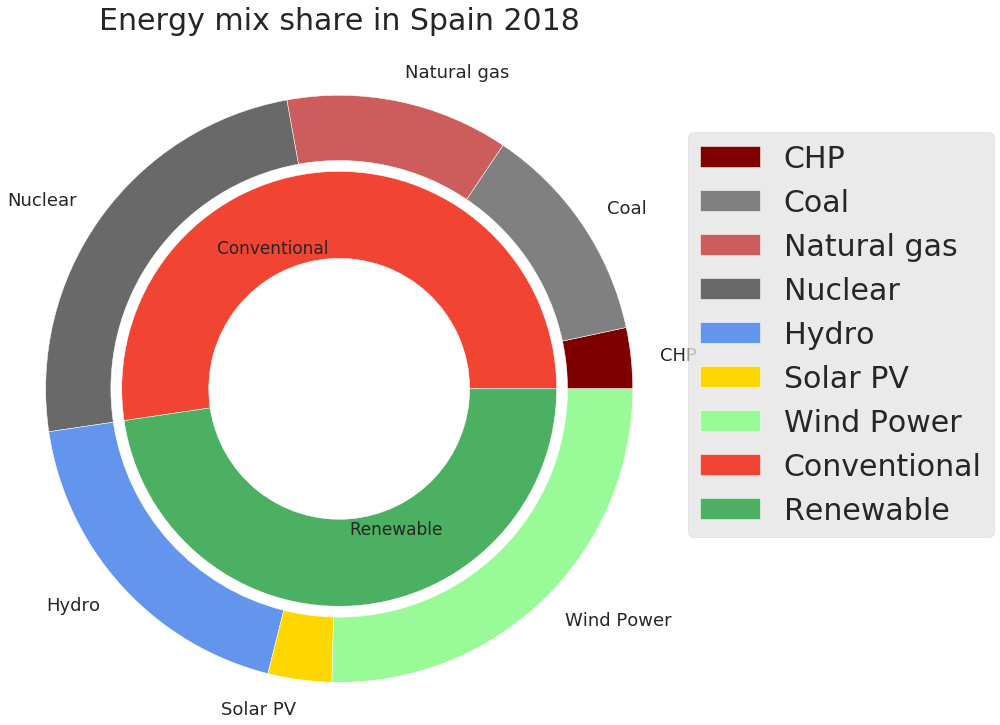

In [414]:
subgroup_names = ['Conventional', 'Renewable']
subgroup_size = [113766671.5, 103612047.6]

group_names = ['CHP', 'Coal', 'Natural gas', 'Nuclear', 'Hydro', 'Solar PV', 'Wind Power']
group_size = [7286376.1, 26575535.6, 26687543.4, 53217216.4, 40784612.6, 7632544, 55194891]

## colors

## outer ring

fig, ax = plt.subplots(figsize=(10,10))

a, b=[plt.cm.Reds, plt.cm.Greens]

ax.axis('equal')

mypie, _ = ax.pie(group_size, radius=1.35, labels=group_names,
                           colors=['maroon', 'grey', 'indianred', 'dimgray', 'cornflowerblue',
                           'gold', 'palegreen'], textprops={'fontsize': '18'})

plt.setp( mypie, width=0.3, edgecolor='white')

## inner ring
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.65, 
                   colors=[a(0.6), b(0.6)], textprops={'fontsize': '17'})

plt.setp( mypie2, width=0.4, edgecolor='white')
plt.legend(loc='best', bbox_to_anchor=(1.2,0.5, 0.5, 0.5), fontsize=30)
plt.margins(0,0)
plt.title('Energy mix share in Spain 2018', loc='center', y=1.15, fontsize=30)

#plt.savefig('figures/nested_pie_2018.png', dpi=300)
plt.show()

By means of a nested pie we can check what happened last year 2018 in Spain for electricity production. According to the nested pie chart above we can see that we covered the roadmap of 20% share of renewable. According to the graph, we are covering 48% by means of renewables sources ans 42% is covered by conventional resources such as Nuclear, natural gas, coal and CHP. When dealing with renewable sources, this 48% has been covered by Hydro and wind power mainly, with a low share of solar PV. That highlights than Spain has a huge opportunity to increase the installed capacity of PV power plants, since the solar irradiance it has is much greater than in other countries such as Germany, and they are not taking advantage on that. Let's hope that this trend will change in the upcoming years. 

## 2.9 Electricity consumption on July 21st and 22nd, 2019. User's trends

One easy way to understand what are our patterns on electricity consumption is by analysing the current electricity demand curve. In this section, we want to see what is the electricity consumption curve by considering the total energy demand in Spain for Sunday 21st of July and Monday 22nd of July. Furthermore, we will also aggregate the resources that cover each time period of energy demand. 
In this case, the data has been obtained from the REE ESIOS website page, where these specific dates have been selected. 

In [3]:
os.getcwd()

'/home/ingrid/Documents/DA_Ironhack/Week5/Project-Week-5-Your-Own-Project/your-project'

In [4]:
time_series = pd.read_csv('datasets/20190722_PBF_sources_2.csv')  #reading the csv file. 

In [5]:
time_series = time_series.drop(['geoid', 'geoname', 'id'], axis=1) #droping some columns. 

In [6]:
time_series.head()

,name,value,datetime
0,PBF_total,27253.3,2019-07-21T00:00:00+02:00
1,PBF_total,26056.7,2019-07-21T01:00:00+02:00
2,PBF_total,24812.3,2019-07-21T02:00:00+02:00
3,PBF_total,23842.3,2019-07-21T03:00:00+02:00
4,PBF_total,23365.2,2019-07-21T04:00:00+02:00


In [7]:
time_series.dtypes

name         object
value       float64
datetime     object
dtype: object

In [8]:
time_series['date'] = pd.to_datetime(time_series['datetime']) #change date into datetime type.
time_series.drop('datetime', axis=1, inplace=True)


In [9]:
time_series['day'] = time_series['date'].dt.day #we only want the day 
time_series['hour'] = time_series['date'].dt.hour #and the hour. 

In [10]:
time_series.head()

,name,value,date,day,hour
0,PBF_total,27253.3,2019-07-21 00:00:00+02:00,21,0
1,PBF_total,26056.7,2019-07-21 01:00:00+02:00,21,1
2,PBF_total,24812.3,2019-07-21 02:00:00+02:00,21,2
3,PBF_total,23842.3,2019-07-21 03:00:00+02:00,21,3
4,PBF_total,23365.2,2019-07-21 04:00:00+02:00,21,4


### Aggregated Electricity consumption in Spain for 21st and 22nd of July, 2019

First of all, we want to see what has been the electricity demand curve for these two days, 21st and 22nd of July, 2019. In this section we are dealing with a different dataset, coming also from Red Eléctrica de España. We are retrieving the data from their Transparency Platform in a csv file that contains the total electricity generated by source and by hour. As can be seen in the Figure below, there are some peaks and valleys in our hourly electricity consumption. 

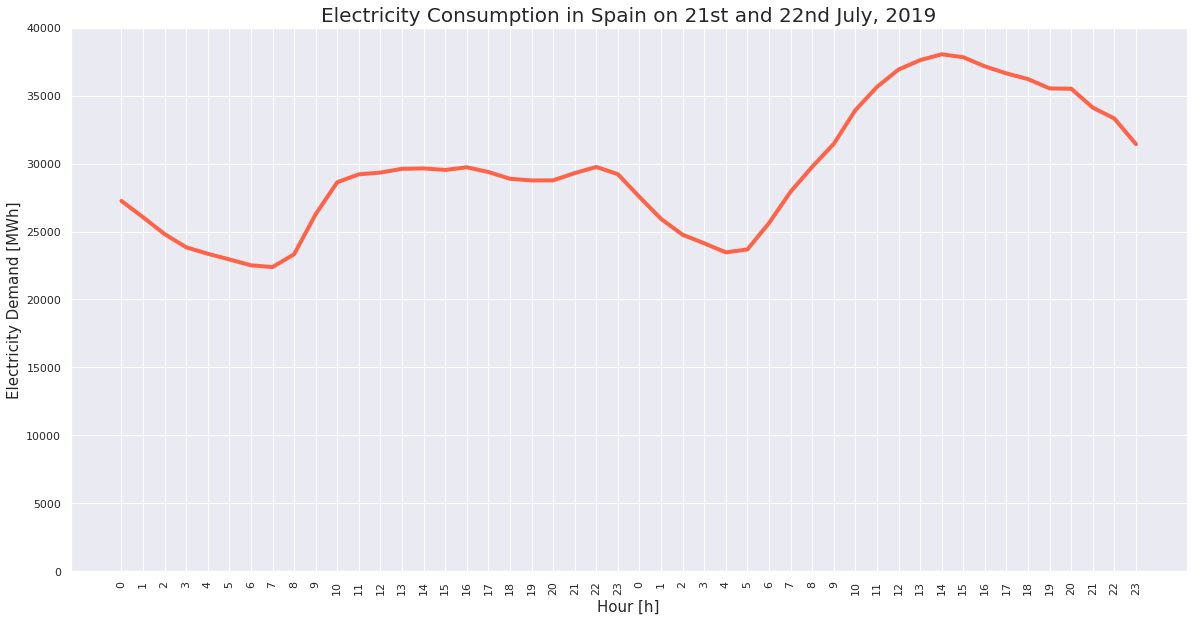

In [11]:
plt.figure(figsize=(20,10))
plt.plot(time_series[time_series['name']=='PBF_total']['value'], linewidth=4, color='tomato')
plt.xticks(np.arange(48), time_series[time_series['name']=='PBF_total']['hour'], rotation='vertical')
plt.title('Electricity Consumption in Spain on 21st and 22nd July, 2019', fontsize=20)
plt.xlabel('Hour [h]', fontsize=15)
plt.ylabel('Electricity Demand [MWh]', fontsize=15)
plt.ylim(0,40000)
plt.savefig('figures/20190721_22_Electricity_Consumption_line.png', dpi=300)
plt.show()

In [12]:
time_series.head()

,name,value,date,day,hour
0,PBF_total,27253.3,2019-07-21 00:00:00+02:00,21,0
1,PBF_total,26056.7,2019-07-21 01:00:00+02:00,21,1
2,PBF_total,24812.3,2019-07-21 02:00:00+02:00,21,2
3,PBF_total,23842.3,2019-07-21 03:00:00+02:00,21,3
4,PBF_total,23365.2,2019-07-21 04:00:00+02:00,21,4


### Stacked electricity demand curve by source for 21st and 22nd of uly, 2019.

However, the idea of this project is to see which resources covers every time period of the two days analysed. To do that, we are working with stacked plots in other to aggregate each source for each hour. In this case, we haven't been able to work in a more automatized way, but the result clearly shows the idea of graph we were looking for. 

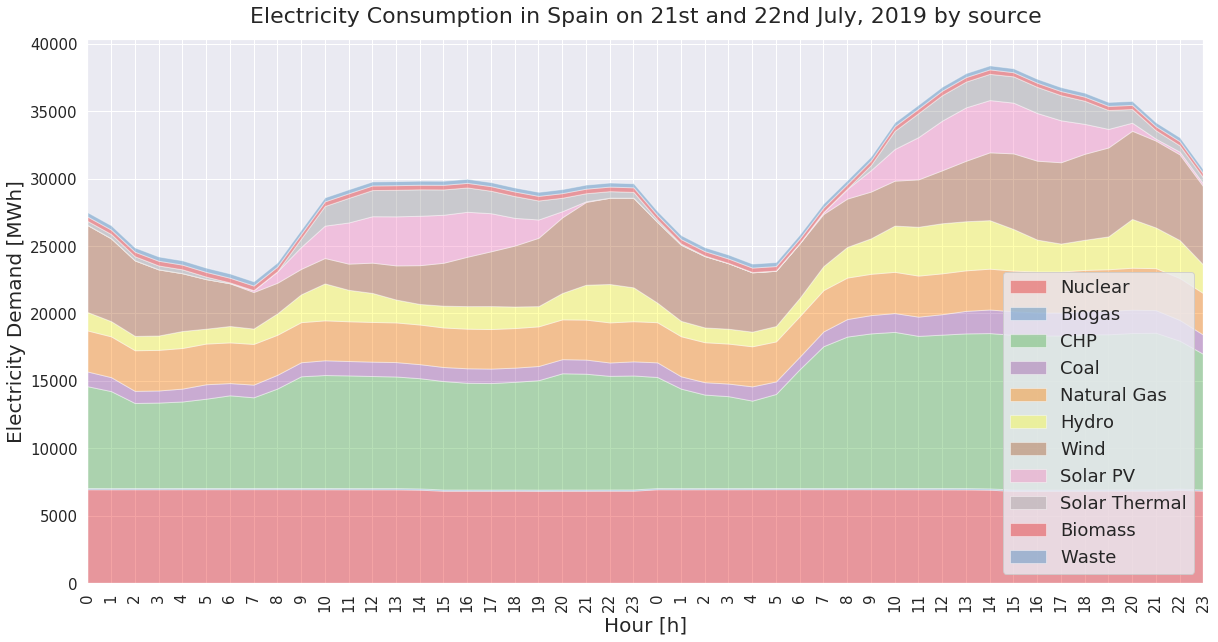

In [36]:
plt.figure(figsize=(20,10))

## series to plot
y1 = time_series[time_series['name']=='Nuclear']['value']
y2 = time_series[time_series['name']=='Biogas']['value']
y3 = time_series[time_series['name']=='SolarThermal']['value']
y4 = time_series[time_series['name']=='Natural_gas']['value']
y5 = time_series[time_series['name']=='Wind']['value']
y6 = time_series[time_series['name']=='CHP']['value']
y7 = time_series[time_series['name']=='Coal']['value']
y8 = time_series[time_series['name']=='Biomass']['value']
y9 = time_series[time_series['name']=='Hydro']['value']
y10 = time_series[time_series['name']=='SolarPV']['value']
y11 = time_series[time_series['name']=='Waste']['value']

#define color pattern
pal = sns.color_palette("Set1")

#define labels to show in the legend, following best practises without "_" 
labels=['Nuclear', 'Biogas', 'CHP', 'Coal', 'Natural Gas', 'Hydro', 'Wind', 'Solar PV',
        'Solar Thermal', 'Biomass', 'Waste']

#plot creation
plt.stackplot(np.arange(48),y1,y2,y6,y7,y4,y9,y5,y10,y3,y8,y11, labels=labels, colors=pal, alpha=0.4)

#If you want to plot also the total electricity demand, just remove the comment in the line below. 
#plt.plot(time_series[time_series['name']=='PBF_total']['value'], linewidth=4, color='tomato')


#changing the xticks to more understandable labels 
plt.xticks(np.arange(48), time_series[time_series['name']=='PBF_total']['hour'], rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Electricity Consumption in Spain on 21st and 22nd July, 2019 by source', fontsize=22, y=1.02)
plt.xlabel('Hour [h]', fontsize=20)
plt.ylabel('Electricity Demand [MWh]', fontsize=20)
plt.xlim(0,47)
plt.legend(loc='lower right', fontsize=18)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=30)
#plt.legend(bbox_to_anchor=(0, -0.2, 1., .102), loc=3, ncol=3, borderaxespad=0.)
plt.savefig('figures/20190721_22_Electricity_Consumption.png', dpi=300)
plt.show()



As can bee seen in this graph, on Sunday 21st of July the electricity consumption was clearly lower than during Monday 22nd of July, 2019. On Sunday 21st of July the electricity consumption had a stable value around 280.000 MWh between 10h and 23h. 

Also, by looking at the graph we can extract that there are some patterns that are repeated. Normally the electricity consumption reaches its minimum between 4-5 in the morning but then at 6-7 starts to rise up. During weekdays, the maximum electricity consumption arrives at noon, and it starts to slowly decrease until 22. After that hour, the electricity consumption drops significantly. 

### 2.10 Conclusions

This project has allowed me to dig deeper into our electricity consumption in Spain, and to be able to propose some question and answer based on data. I have been able to prove that data follow a normal distribution and also to prove the Central Limit Theorem, by aggregating equally distributed random variables and leading into a new random variable that follows a normal distribution. 

Also, by means of this project I have been able to answer the questions I proposed myself to. We are on the path towards 20-20-20, and also we have some repeated patterns throughout the hours of the days, throughout the days of the week and also throughout the years. We are not so unique, huh? ;)

Last but not least, I have analysed the share of renewable energies, and surprisely we are on the path towards 20-20-20 objectives, even if we are not working on increasing our installed capacity of PV Power plants. However, a 48% share of renewables was covering the total yearly demand in 2018. There's still a lot to do to decrease our carbon footprint and to be less hazardous for the Earth and the environment, but every step counts. 


## Links for resources 


### Heating isolation systems in Spain

[1] https://eforenergy.org/docpublicaciones/.../WP06-2011.pdf


[2] http://www.surinenglish.com/local/201801/12/homes-cold-costa-20180112092737-v.html

### Spanish Electricity consumption in summers

[3] https://earthobservatory.nasa.gov/images/87359/2015-was-the-hottest-year-on-record

### Electricity price in Spain

[4] https://aleasoft.com/2018-second-most-expensive-year-spanish-electricity-market-history/

[5] https://aleasoft.com/new-record-spanish-electricity-market-most-expensive-second-quarter-last-decade/

[6] http://thecorner.eu/spain-economy/crazy-rising-spanish-households-electricity-bill/61432/